<h1>Importing Libraries</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from sklearn import datasets

<h1>Neural Network Implementation</h1>

In [2]:
class Neural_Network():
    def __init__(self, neurons, Activations, epochs=1000, learning_rate=0.001, loss='squared'): 
        # arguments: an array "neurons" consist of number of neurons for each layer, 
        # an array "activations" consisting of activation functions used for the hidden layers and output layer
        self.inputSize = neurons[0] # Number of neurons in input layer
        self.outputSize = neurons[-1] # Number of neurons in output layer
        self.layers = len(neurons)
        self.weights = [] #weights for each layer
        self.biases = [] #biases in each layer 
        self.layer_activations = [] #activations in each layer
        self.epochs = epochs #number of epochs to train the network
        self.learning_rate = learning_rate #learning rate used for training
        self.loss_function = loss
        for i in range(len(neurons)-1): 
            self.weights.append(np.random.rand(neurons[i+1],neurons[i])) #weight matrix between layer i and layer i+1
            self.biases.append(np.random.rand(neurons[i+1],1))
            self.layer_activations.append(Activations[i]) #activations for each layer
        
    def sigmoid(self, z): # sigmoid activation function
        #Fill in the details to compute and return the sigmoid activation function                  
        return 1.0 / (1.0 + np.exp(-z))
    
    def sigmoidPrime(self, z): # derivative of sigmoid activation function
        #Fill in the details to compute and return the derivative of sigmoid activation function
        return self.sigmoid(z) * (1 - self.sigmoid(z))
                          
    def tanh(self, z): # hyperbolic tan activation function
        #Fill in the details to compute and return the tanh activation function                  
        exp_z = np.exp(z)
        exp_z_negative = np.exp(-z)
        return (exp_z - exp_z_negative) / (exp_z + exp_z_negative)  
    
    def tanhPrime(self, z): # derivative of hyperbolic tan activation function
        #Fill in the details to compute and return the derivative of tanh activation function
        return 1 - self.tanh(z) ** 2
                          
    def linear(self, z): # Linear activation function
        #Fill in the details to compute and return the linear activation function                                    
        return z
    
    def linearPrime(self, z): # derivative of linear activation function
        #Fill in the details to compute and return the derivative of activation function                                                      
        return np.ones(z.shape)

    def ReLU(self, z): # ReLU activation function
        #Fill in the details to compute and return the ReLU activation function                  
        return np.where(z < 0, 0, z)
    
    def ReLUPrime(self, z): # derivative of ReLU activation function
        #Fill in the details to compute and return the derivative of ReLU activation function
        return np.where(z < 0, 0, 1)
    
    def forward(self, a): # function of forward pass which will receive input and give the output of final layer
        # Write the forward pass using the weights and biases to find the predicted value and return them.
        layer_activations_a = [a] #store the input as the input layer activations
        layer_dot_prod_z = []
        for i, param in enumerate(zip(self.biases, self.weights)):
            b, w = param[0], param[1]
            z = np.dot(w, a) + b
            if self.layer_activations[i].lower()  == 'sigmoid':
                a = self.sigmoid(z)
            elif self.layer_activations[i].lower() == 'relu':
                a = self.ReLU(z)    
            elif self.layer_activations[i].lower() == 'tanh':   
                a = self.tanh(z)
            elif self.layer_activations[i].lower() == 'linear':
                a = self.linear(z)
            layer_dot_prod_z.append(z)    
            layer_activations_a.append(a)
        return a, layer_dot_prod_z, layer_activations_a
        
    def loss(self, Y_hat, Y):
        #Implement the loss function
        if self.loss_function.lower() == 'cross-entropy':
            epsilon = 10 ** -5
            Y_hat = np.where(Y_hat == 1, 1 - epsilon, Y_hat)
            Y_hat = np.where(Y_hat == 0, epsilon, Y_hat)
            error = - Y * np.log(Y_hat) - (1 - Y) * np.log(1 - Y_hat) 
        elif self.loss_function.lower() == 'squared':
            error = 0.5 * (Y_hat - Y) ** 2
        return error

    def loss_grad(self, Y_hat, Y):
        #Return the gradient of the loss function
        if self.loss_function.lower() == 'cross-entropy':
            epsilon = 10 ** -5
            Y_hat = np.where(Y_hat == 1, 1 - epsilon, Y_hat)
            Y_hat = np.where(Y_hat == 0, epsilon, Y_hat)
            grad = - Y / Y_hat - (1 - Y) / (1 - Y_hat) 
        elif self.loss_function.lower() == 'squared':
            grad = Y_hat - Y
        return grad
        
    def backward(self, x, y, zs, activations): # find the loss and return derivative of loss w.r.t every parameter
        # Write the backpropagation algorithm here to find the gradients of weights and biases and return them.
        # Assuming L2 loss
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]

        delta = self.loss_grad(activations[-1], y)
        if self.layer_activations[-1].lower() == 'sigmoid':
            delta = delta * self.sigmoidPrime(zs[-1])
        elif self.layer_activations[-1].lower() == 'relu':
            delta = delta * self.ReLUPrime(zs[-1])
        elif self.layer_activations[-1].lower() == 'tanh':
            delta = delta * self.tanhPrime(zs[-1])   
        elif self.layer_activations[-1].lower() == 'linear':
            delta = delta * self.linearPrime(zs[-1])
        
        # Number of training examples = m
        m = delta.shape[1]
        # fill in the appropriate details for gradients of w and b
        grad_w[-1] = np.dot(delta, activations[-2].T) / m 
        grad_b[-1] = np.sum(delta, axis=1, keepdims=True) / m

        for l in range(2, self.layers): # Here l is in backward sense i.e. last lth layer
            z = zs[-l]
            if self.layer_activations[-l].lower() == 'sigmoid':
                prime = self.sigmoidPrime(z)
            elif self.layer_activations[-l].lower() == 'relu':
                prime = self.ReLUPrime(z)
            elif self.layer_activations[-l].lower() == 'tanh':   
                prime = self.tanhPrime(z)
            elif self.layer_activations[-l].lower() == 'linear':
                prime = self.linearPrime(z)

            #Compute delta, gradients of b and w
            delta = np.dot(self.weights[-l+1].T, delta) * prime
            grad_w[-l] = np.dot(delta, activations[-l-1].T) / m 
            grad_b[-l] = np.sum(delta, axis=1, keepdims=True) / m

        return (grad_b, grad_w)   

    def update_parameters(self, grads, learning_rate): # update the parameters using the gradients
        # update weights and biases using the gradients and the learning rate
        grad_b, grad_w = grads[0], grads[1]       
        
        #Implement the update rule for weights  and biases
        self.weights = [self.weights[i] - learning_rate * grad_w[i] for i in range(len(self.weights))]
        self.biases = [self.biases[i] - learning_rate * grad_b[i] for i in range(len(self.biases))] 

    def train(self, X, Y, minibatch=False, batch_size=20): # receive the full training data set
        lr = self.learning_rate # learning rate
        epochs = self.epochs # number of epochs
        loss_list = []
        num_updates = 0 # number of updates
        for e in range(epochs): 
            losses = []
            for q in range(len(X)):
                if minibatch == False:
                    rows, cols = X[q].shape[0], 1
                else:
                    rows, cols = X[q].shape[1], X[q].shape[0]
                train_x = np.resize(X[q], (rows, cols))
                
                if not onehotencoded: 
                    train_y = np.resize(Y[q],(1,1)) 
                else:
                    train_y = np.resize(np.argmax(Y[q]),(1,1)) 
                
                out, dot_prod_z, activations_a = self.forward(train_x)
                loss = self.loss(out, train_y)
                grads = self.backward(train_x, train_y, dot_prod_z, activations_a) # find the gradients using backward pass
                self.update_parameters(grads, lr)
                num_updates += 1
                losses.append(loss)
            
            loss_mean = np.mean(np.array(losses))
            loss_list.append(loss_mean)
            print(f'Epoch: {e} Loss: {loss_mean}')
            print(f'Epoch: {e} Number of updates: {num_updates}')
            num_updates = 0
        return loss_list
        
    def predict(self, x):
        print ("Input : \n" + str(x))
        prediction,_,_ = self.forward(x)
        print ("Output: \n" + str(prediction))


# Miscellaneous Functions

### One-hot encoder

In [3]:
# a method for creating one hot encoded labels 
def onehotencoding(Y):
    rows = Y.shape[0]
    values = {e:i for i, e in enumerate(np.unique(Y))}
    y_enc = np.zeros((rows, len(values)))
    for i in range(rows):
        j = values[Y[i]]
        y_enc[i][j] = 1
    return y_enc

### Create mini-batches

In [4]:
#a method to create minibatches 
def create_minibatches(X, Y, minibatchsize):
    numbatches = int(np.ceil(len(X)/minibatchsize))
    idx = np.arange(len(X))
    np.random.shuffle(idx)
    X_minibatches = []
    Y_minibatches = [] 
    for i in range(numbatches):
        idx_minibatch = idx[i*minibatchsize:min(len(idx),(i+1)*minibatchsize)]
        xn = np.take(X,idx_minibatch,axis=0) 
        yn = np.take(Y,idx_minibatch,axis=0)
        X_minibatches.append(xn)
        Y_minibatches.append(yn)
    X_minibatches, Y_minibatches = np.array(X_minibatches), np.array(Y_minibatches)
    return X_minibatches, Y_minibatches

### Test mini-batches created

In [5]:
def test_create_minibatches():
    X = []
    Y = []
    batch_size = 2
    for i in range(20):
        if(i % 2 == 0):
            X.append([np.random.randint(1,10) for i1 in range(inputsize)])
            Y.append(1)
        else:
            X.append([np.random.randint(-10,1) for i1 in range(inputsize)])
            Y.append(0)
    X = np.array(X)
    Y = np.array(Y)

    X_mb, Y_mb = create_minibatches(X,Y,batch_size)
    print(X_mb, Y_mb)


### Generate random data

In [6]:
def generateData(inputsize=3, onehotencoded=False, minibatch=False, batch_size=5):
    X = []
    Y = []
    for i in range(500):
        if(i % 2 == 0):
            X.append([random.randint(1,10) for i1 in range(inputsize)])
            Y.append(1)
        else:
            X.append([random.randint(-10,1) for i1 in range(inputsize)])
            Y.append(0)
    X = np.array(X)
    Y = np.array(Y)
    if onehotencoded:
        Y = onehotencoding(Y)

    if minibatch == False:
        train_X = X
        train_Y = Y
    else:
        train_X, train_Y = create_minibatches(X, Y, batch_size)
    return train_X, train_Y

# Question 2(1)(d)

In [7]:
def question_2d():
    #D_in is input dimension
    #H1 is dimension of first hidden layer 
    #H2 is dimension of second hidden layer
    #D_out is output dimension.
    epochs = 20
    learning_rate = 0.001
    inputsize = 3
    loss_function = 'squared'
    
    onehotencoded = False
    minibatch = False
    train_X, train_Y = generateData(inputsize, onehotencoded, minibatch)

    D_in, H1, H2, H3, H4, D_out = inputsize, 10, 5, 10, 5, 1 
    # list of number of neurons in the layers sequentially.
    neurons = [D_in, H1, H2, H3, H4, D_out] 
    # activations in each layer (Note: the input layer does not have any activation)
    activation_functions = ['linear','linear', 'tanh', 'relu', 'sigmoid'] 

    # Train the network
    neuralnet = Neural_Network(neurons, activation_functions, epochs, learning_rate, loss_function)
    loss = neuralnet.train(train_X, train_Y, minibatch=minibatch)
    
    # Predict on the trained network
    neuralnet.predict(np.array([8,4,9]).reshape((3,1)))
    
    # Plot the results
    plt.plot(loss)
    plt.show()

# question_2d()

# Question 2(1)(e)

In [8]:
def question_2e():
    #D_in is input dimension
    #H1 is dimension of first hidden layer 
    #H2 is dimension of second hidden layer
    #D_out is output dimension.
    epochs = 100
    learning_rate = 0.001
    inputsize = 3
    loss_function = 'squared'

    onehotencoded = False
    minibatch = True
    batch_size = 20
    train_X, train_Y = generateData(inputsize, onehotencoded, minibatch, batch_size)
    print(train_X.shape, train_Y.shape)

    D_in, H1, H2, H3, H4, D_out = inputsize, 10, 5, 10, 5, 1 
    # list of number of neurons in the layers sequentially.
    neurons = [D_in, H1, H2, H3, H4, D_out] 
    # activations in each layer (Note: the input layer does not have any activation)
    activation_functions = ['linear','linear', 'tanh', 'relu', 'sigmoid'] 

    # Train the network
    neuralnet = Neural_Network(neurons, activation_functions, epochs, learning_rate, loss_function)
    loss = neuralnet.train(train_X, train_Y, minibatch=minibatch)
    
    # Predict on the trained network
    neuralnet.predict(np.array([8,4,9]).reshape((3,1)))
    
    # Plot the results
    plt.plot(loss)
    plt.show()

# question_2e()

# Question 2(1)(f)
### Observation 
Stochastic gradient descent performs better than mini-batch gradient descent.
### Why?

# Question 2(2)

### Exploding and vanishing gradients

# Question 3
### Import dataset

In [9]:
def loadData():
    data = datasets.load_digits()
    return data['data'], data['target']

### Data preprocessing

In [10]:
def preprocess():
    X, Y = loadData()
    X = X / 255
    return X, Y
    

### Create a neural network

(1,) (1,)
Epoch: 0 Loss: 2081.7102764365145
Epoch: 0 Number of updates: 1
Epoch: 1 Loss: 2028.3485687115547
Epoch: 1 Number of updates: 1
Epoch: 2 Loss: 1976.354713124116
Epoch: 2 Number of updates: 1
Epoch: 3 Loss: 1925.6936467133241
Epoch: 3 Number of updates: 1
Epoch: 4 Loss: 1876.3312053078698
Epoch: 4 Number of updates: 1
Epoch: 5 Loss: 1828.2341004868026
Epoch: 5 Number of updates: 1
Epoch: 6 Loss: 1781.3698971309054
Epoch: 6 Number of updates: 1
Epoch: 7 Loss: 1735.7069915495092
Epoch: 7 Number of updates: 1
Epoch: 8 Loss: 1691.2145901679962
Epoch: 8 Number of updates: 1
Epoch: 9 Loss: 1647.862688761611
Epoch: 9 Number of updates: 1
Epoch: 10 Loss: 1605.6220522215983
Epoch: 10 Number of updates: 1
Epoch: 11 Loss: 1564.464194839992
Epoch: 11 Number of updates: 1
Epoch: 12 Loss: 1524.3613610997834
Epoch: 12 Number of updates: 1
Epoch: 13 Loss: 1485.2865069575096
Epoch: 13 Number of updates: 1
Epoch: 14 Loss: 1447.2132816056285
Epoch: 14 Number of updates: 1
Epoch: 15 Loss: 1410.11

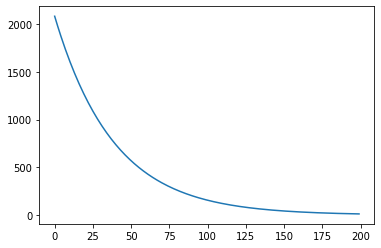

In [12]:
# Number of neurons in each layer
neurons = [64, 256, 128, 1]
activations = ['sigmoid', 'sigmoid', 'relu']
loss_function = 'squared'
epochs = 200
learning_rate = 0.0001

# Data preprocessing
onehotencoded = False
minibatch = True
batch_size = 1500
X, Y = preprocess()
# Y = onehotencoding(Y)
X, Y = create_minibatches(X, Y, batch_size)

# Split training and test data
num_training = 1500 // batch_size
train_X, train_Y = X[: num_training], Y[: num_training]
test_X, test_Y = X[num_training:], Y[num_training:]

print(train_X.shape, train_Y.shape)

 # Train the network
neuralnet = Neural_Network(neurons, activations, epochs, learning_rate, loss_function)
loss = neuralnet.train(train_X, train_Y, minibatch=minibatch)

# Plot the results
plt.plot(loss)
plt.show()